In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/synthetic_social_media_data.csv')
df.head(5)

,Post ID,Post Content,Sentiment Label,Number of Likes,Number of Shares,Number of Comments,User Follower Count,Post Date and Time,Post Type,Language
0,aa391375-7355-44b7-bcbf-97fb4e5a2ba3,Word who nor center everything better politica...,Neutral,157,243,64,4921,2024-01-10 00:14:21,video,fr
1,1c9ec98d-437a-48d9-9cba-bd5ad853c59a,Begin administration population good president...,Positive,166,49,121,612,2024-02-03 00:20:11,image,es
2,170e5b5b-1d9a-4d02-a957-93c4dbb18908,Thousand total sign. Agree product relationshi...,Positive,185,224,179,9441,2024-07-25 14:20:23,video,de
3,aec53496-60ee-4a06-8821-093a04dc8770,Individual from news third. Oil forget them di...,Neutral,851,369,39,6251,2024-02-20 09:15:09,text,de
4,4eacddb7-990d-4056-8784-7e1d5c4d1404,Time adult letter see reduce. Attention sudden...,Negative,709,356,52,1285,2024-03-01 04:17:35,image,de


In [3]:
# Cálculo do método de Sturges
k = np.ceil(1 + 3.322 * np.log10(len(df))).astype(int) # Fórmula para calcular o número de classes, k = 1 + 3.322 * log(n)

# Tamanho de cada classe
tam_classe = (df['User Follower Count'].max() - df['User Follower Count'].min()) / k # Calculando o tamanho da classe: (max - min) / n° de classes

bins = np.arange(df['User Follower Count'].min(), df['User Follower Count'].max() + tam_classe, tam_classe) # Cria os intervalos de classes
df['Classe Seguidores'] = pd.cut(df['User Follower Count'], bins=bins, include_lowest=True) # Adiciona a coluna de classes

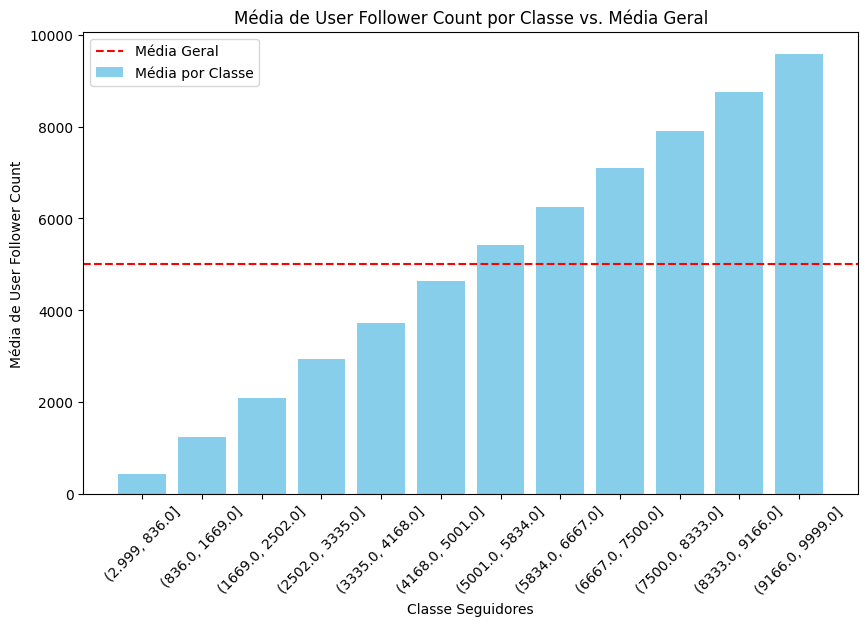

In [4]:
media_geral = df['User Follower Count'].mean()
media_por_classe = df.groupby('Classe Seguidores', observed=False)['User Follower Count'].mean() # Agrupa os valores com base no range da Classe Seguidores e calcula a média de cada intervalo.

plt.figure(figsize=(10, 6))
plt.bar(media_por_classe.index.astype(str), media_por_classe.values, label='Média por Classe', color='skyblue') # Cria as barras com base nas médias da Classe Seguidores
plt.axhline(y=media_geral, color='r', linestyle='--', label='Média Geral') # Cria uma linha tracejada que indica a média geral da User Follower Count
plt.xlabel('Classe Seguidores')
plt.ylabel('Média de User Follower Count')
plt.title('Média de User Follower Count por Classe vs. Média Geral')
plt.legend()
plt.xticks(rotation=45)
plt.show()

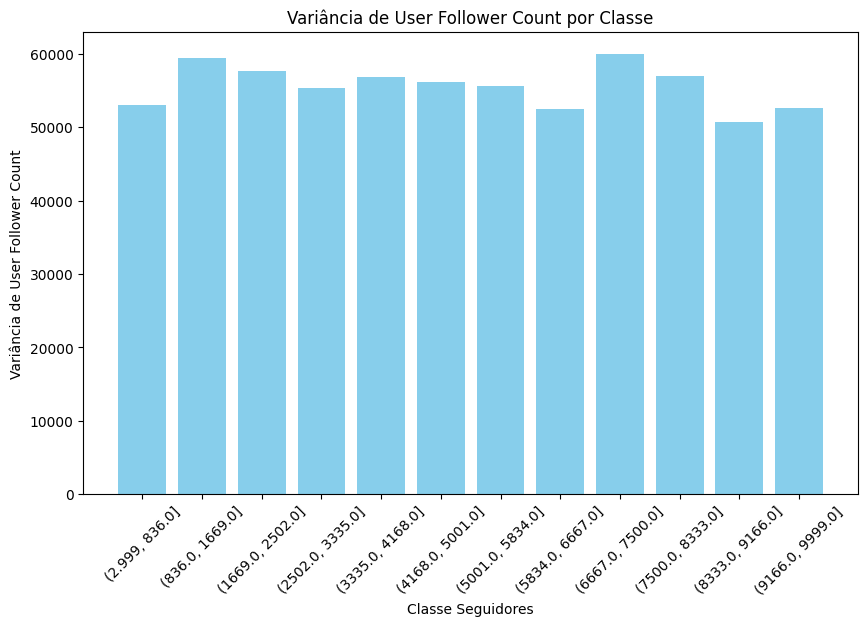

In [5]:
var_geral = df['User Follower Count'].var()
var_por_classe = df.groupby('Classe Seguidores', observed=False)['User Follower Count'].var() # Agrupa os valores com base nos intervalos da Classe Seguidores e calcula a variância de cada intervalo

plt.figure(figsize=(10, 6))
plt.bar(var_por_classe.index.astype(str), var_por_classe.values, color='skyblue', label='Variância por Classe')
plt.xlabel('Classe Seguidores')
plt.ylabel('Variância de User Follower Count')
plt.title('Variância de User Follower Count por Classe')
plt.xticks(rotation=45)
np.sqrt(var_geral)
plt.show()

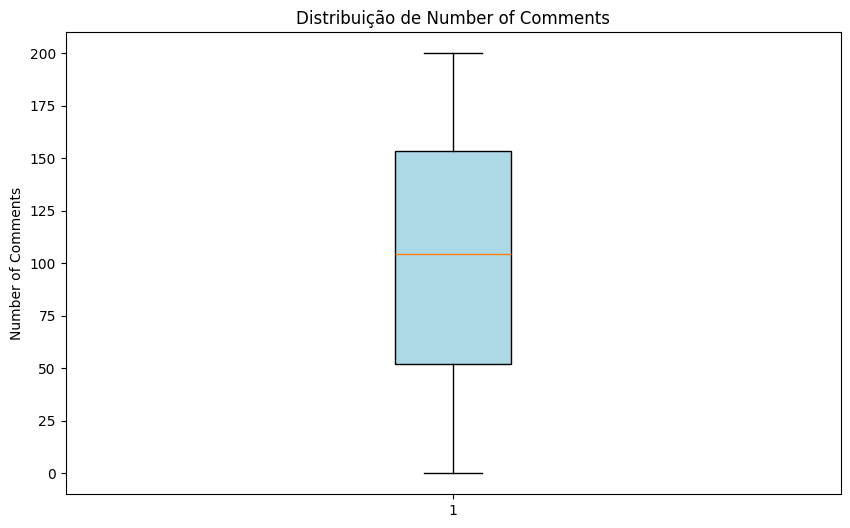

In [6]:
quartis_df = df['Number of Comments'].quantile([0.25, 0.5, 0.75])

plt.figure(figsize=(10, 6))
plt.boxplot(df['Number of Comments'], vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Distribuição de Number of Comments')
plt.ylabel('Number of Comments')
plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Post ID              2000 non-null   object  
 1   Post Content         2000 non-null   object  
 2   Sentiment Label      2000 non-null   object  
 3   Number of Likes      2000 non-null   int64   
 4   Number of Shares     2000 non-null   int64   
 5   Number of Comments   2000 non-null   int64   
 6   User Follower Count  2000 non-null   int64   
 7   Post Date and Time   2000 non-null   object  
 8   Post Type            2000 non-null   object  
 9   Language             2000 non-null   object  
 10  Classe Seguidores    2000 non-null   category
dtypes: category(1), int64(4), object(6)
memory usage: 158.8+ KB


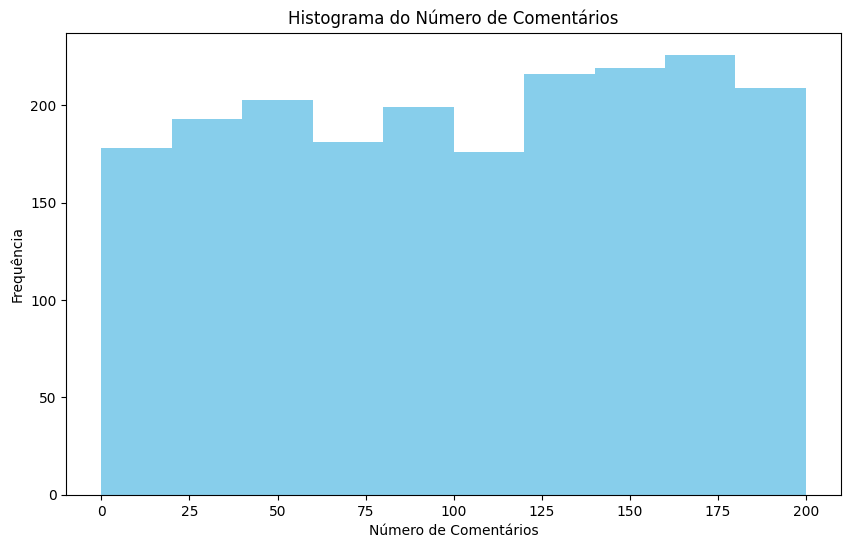

In [8]:
plt.figure(figsize=(10,6))
plt.hist(df['Number of Comments'], color='skyblue')
plt.xlabel('Número de Comentários')
plt.ylabel('Frequência')
plt.title('Histograma do Número de Comentários')
plt.show()

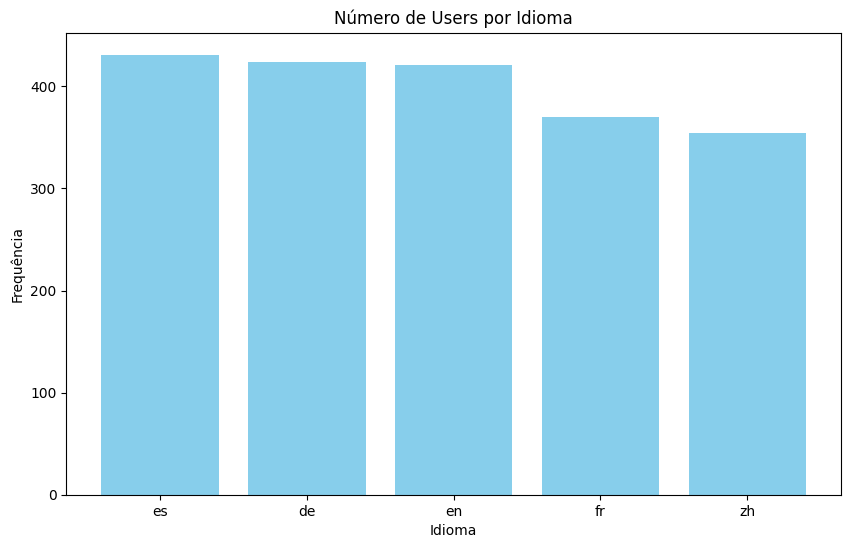

In [9]:
plt.figure(figsize=(10, 6))
ocorrencias = df['Language'].value_counts()

plt.bar(ocorrencias.index, ocorrencias.values, color='skyblue')
plt.xlabel('Idioma')
plt.ylabel('Frequência')
plt.title('Número de Users por Idioma')
plt.show()

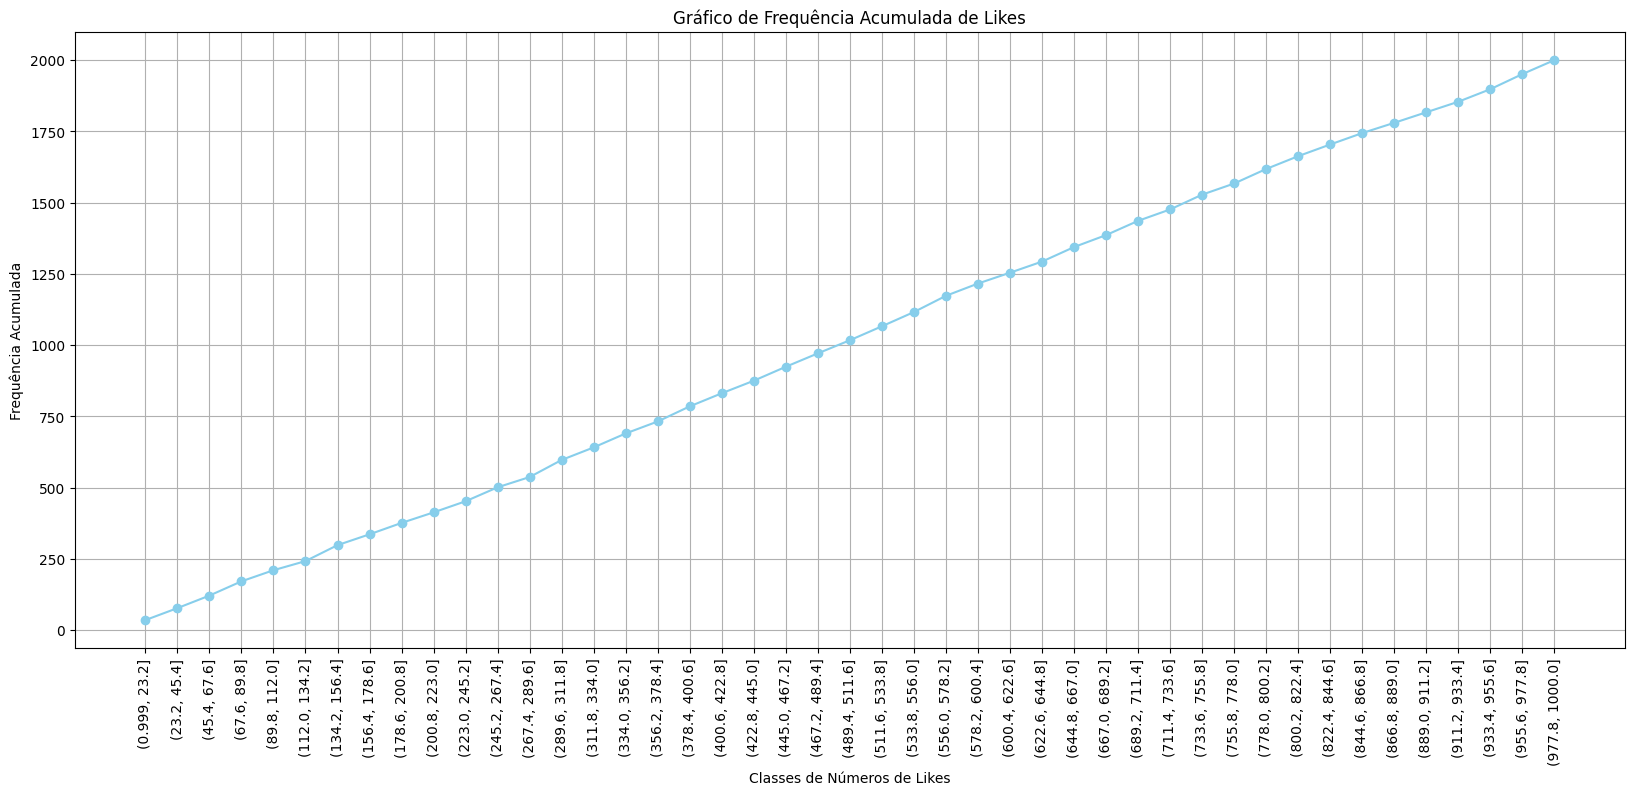

array([   1. ,   23.2,   45.4,   67.6,   89.8,  112. ,  134.2,  156.4,
        178.6,  200.8,  223. ,  245.2,  267.4,  289.6,  311.8,  334. ,
        356.2,  378.4,  400.6,  422.8,  445. ,  467.2,  489.4,  511.6,
        533.8,  556. ,  578.2,  600.4,  622.6,  644.8,  667. ,  689.2,
        711.4,  733.6,  755.8,  778. ,  800.2,  822.4,  844.6,  866.8,
        889. ,  911.2,  933.4,  955.6,  977.8, 1000. ])

In [14]:
num_observacoes = df['Number of Likes'].count()
num_classes = int(np.ceil(np.sqrt(num_observacoes)))
bins = np.linspace(df['Number of Likes'].min(), df['Number of Likes'].max(), num_classes + 1)

classe_likes = pd.cut(df['Number of Likes'], bins=bins, include_lowest=True)
frequencia = classe_likes.value_counts().sort_index()
frequencia_acumulada = frequencia.cumsum()

plt.figure(figsize=(20, 8))
plt.plot(frequencia_acumulada.index.astype(str), frequencia_acumulada.values, marker='o', linestyle='-', color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Classes de Números de Likes')
plt.ylabel('Frequência Acumulada')
plt.title('Gráfico de Frequência Acumulada de Likes')
plt.grid()
plt.show()
num_classes
bins

[]

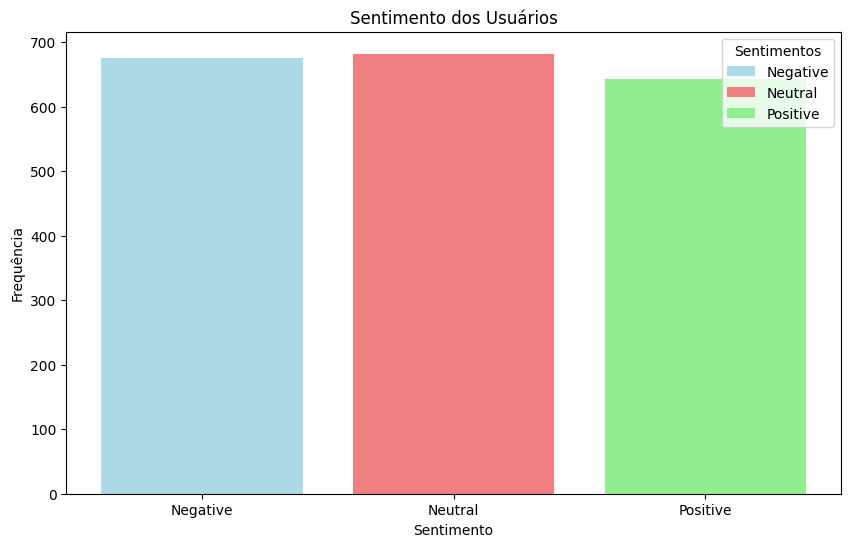

In [11]:
plt.figure(figsize=(10, 6))
sentiment_label = df.groupby('Sentiment Label').size()
bars = plt.bar(sentiment_label.index, sentiment_label.values, color=['lightblue', 'lightcoral', 'lightgreen'])
plt.xlabel('Sentimento')
plt.ylabel('Frequência')
plt.title('Sentimento dos Usuários')
plt.legend(bars, sentiment_label.index, title="Sentimentos", loc="best")
plt.plot()

In [12]:
df['Language'].value_counts()
k

np.int64(12)